<a href="https://colab.research.google.com/github/shanmukha-anreddy/Corizo/blob/main/shanmukha_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CAPSTONE PROJECT 1

In [21]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

# Load the cleaned datasets
female_data = pd.read_csv('/content/cleaned_nhanes_adult_female_bmx_2020.csv')
male_data = pd.read_csv('/content/cleaned_nhanes_adult_male_bmx_2020.csv')

# Convert the datasets to numpy arrays for numerical processing
female = female_data.to_numpy()
male = male_data.to_numpy()

Plot histograms for male and female weights

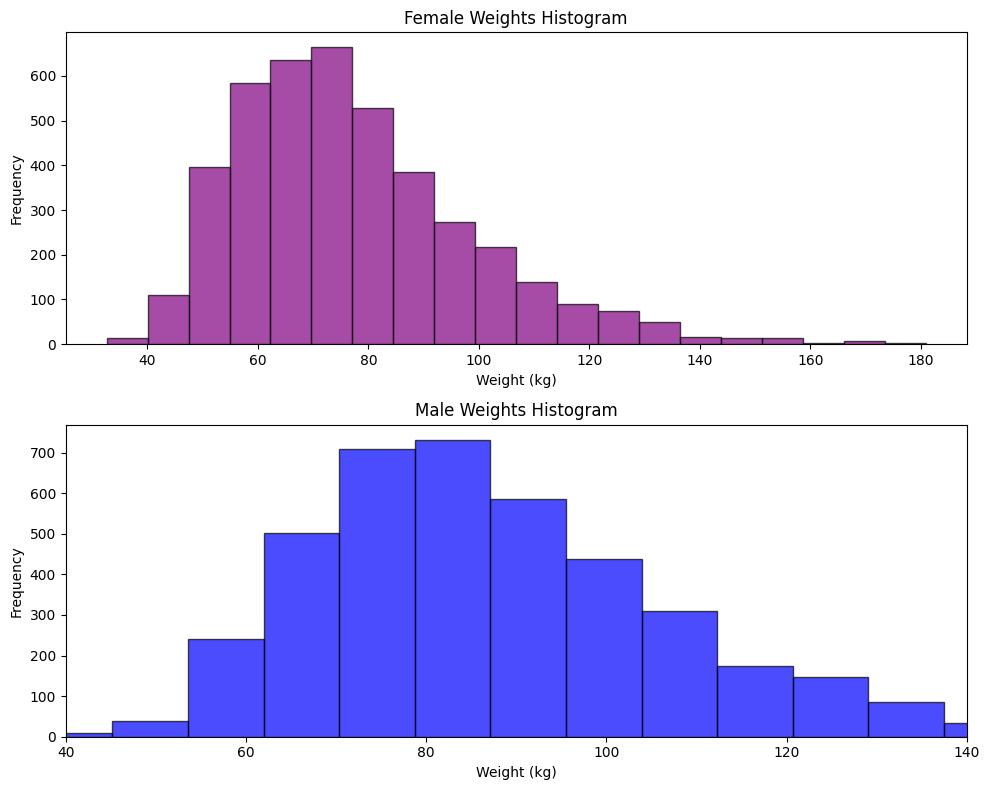

In [22]:
# Step 3: Plot histograms for male and female weights
plt.figure(figsize=(10, 8))

# Female weights histogram
plt.subplot(2, 1, 1)
plt.hist(female[:, 0], bins=20, alpha=0.7, color='purple', edgecolor='black')
plt.title('Female Weights Histogram')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

# Male weights histogram
plt.subplot(2, 1, 2)
plt.hist(male[:, 0], bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.title('Male Weights Histogram')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

# Setting x-axis limits for consistency
plt.xlim(40, 140)
plt.tight_layout()
plt.show()

Box-and-Whisker Plot for Male and Female Weights

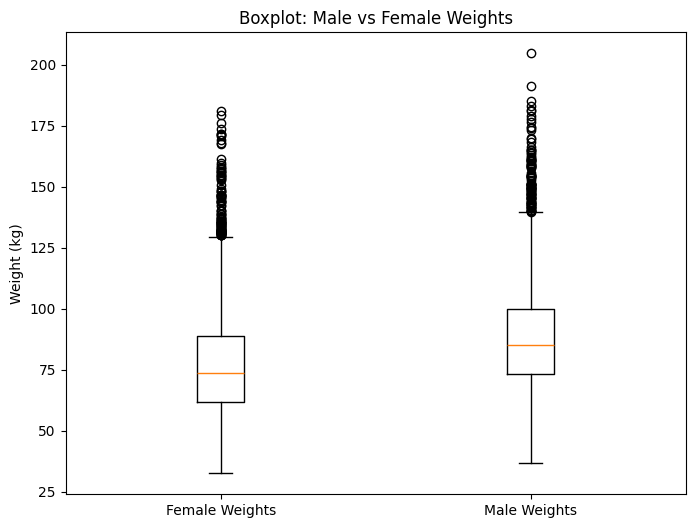

In [23]:
# Step 4: Box-and-Whisker Plot for Male and Female Weights
plt.figure(figsize=(8, 6))
plt.boxplot([female[:, 0], male[:, 0]], labels=['Female Weights', 'Male Weights'])
plt.title('Boxplot: Male vs Female Weights')
plt.ylabel('Weight (kg)')
plt.show()

Compute basic statistics

In [24]:
# Step 5: Compute basic statistics
female_weight_stats = {
    "mean": np.mean(female[:, 0]),
    "median": np.median(female[:, 0]),
    "std": np.std(female[:, 0]),
    "skewness": "Left-skewed" if np.mean(female[:, 0]) < np.median(female[:, 0]) else "Right-skewed",
}
male_weight_stats = {
    "mean": np.mean(male[:, 0]),
    "median": np.median(male[:, 0]),
    "std": np.std(male[:, 0]),
    "skewness": "Left-skewed" if np.mean(male[:, 0]) < np.median(male[:, 0]) else "Right-skewed",
}

print("Female Weight Statistics:", female_weight_stats)
print("Male Weight Statistics:", male_weight_stats)

Female Weight Statistics: {'mean': 77.40379057095475, 'median': 73.6, 'std': 21.54250829019315, 'skewness': 'Right-skewed'}
Male Weight Statistics: {'mean': 88.36454300416565, 'median': 85.0, 'std': 21.418936717962495, 'skewness': 'Right-skewed'}


Add BMI column to the female dataset

In [25]:
# Step 6: Add BMI column to the female dataset
female_bmi = female[:, 0] / (female[:, 1] / 100) ** 2
female = np.column_stack((female, female_bmi))

Standardize female data

In [26]:
# Step 7: Standardize female data
zfemale = (female - female.mean(axis=0)) / female.std(axis=0)

Scatterplot matrix for standardized female data

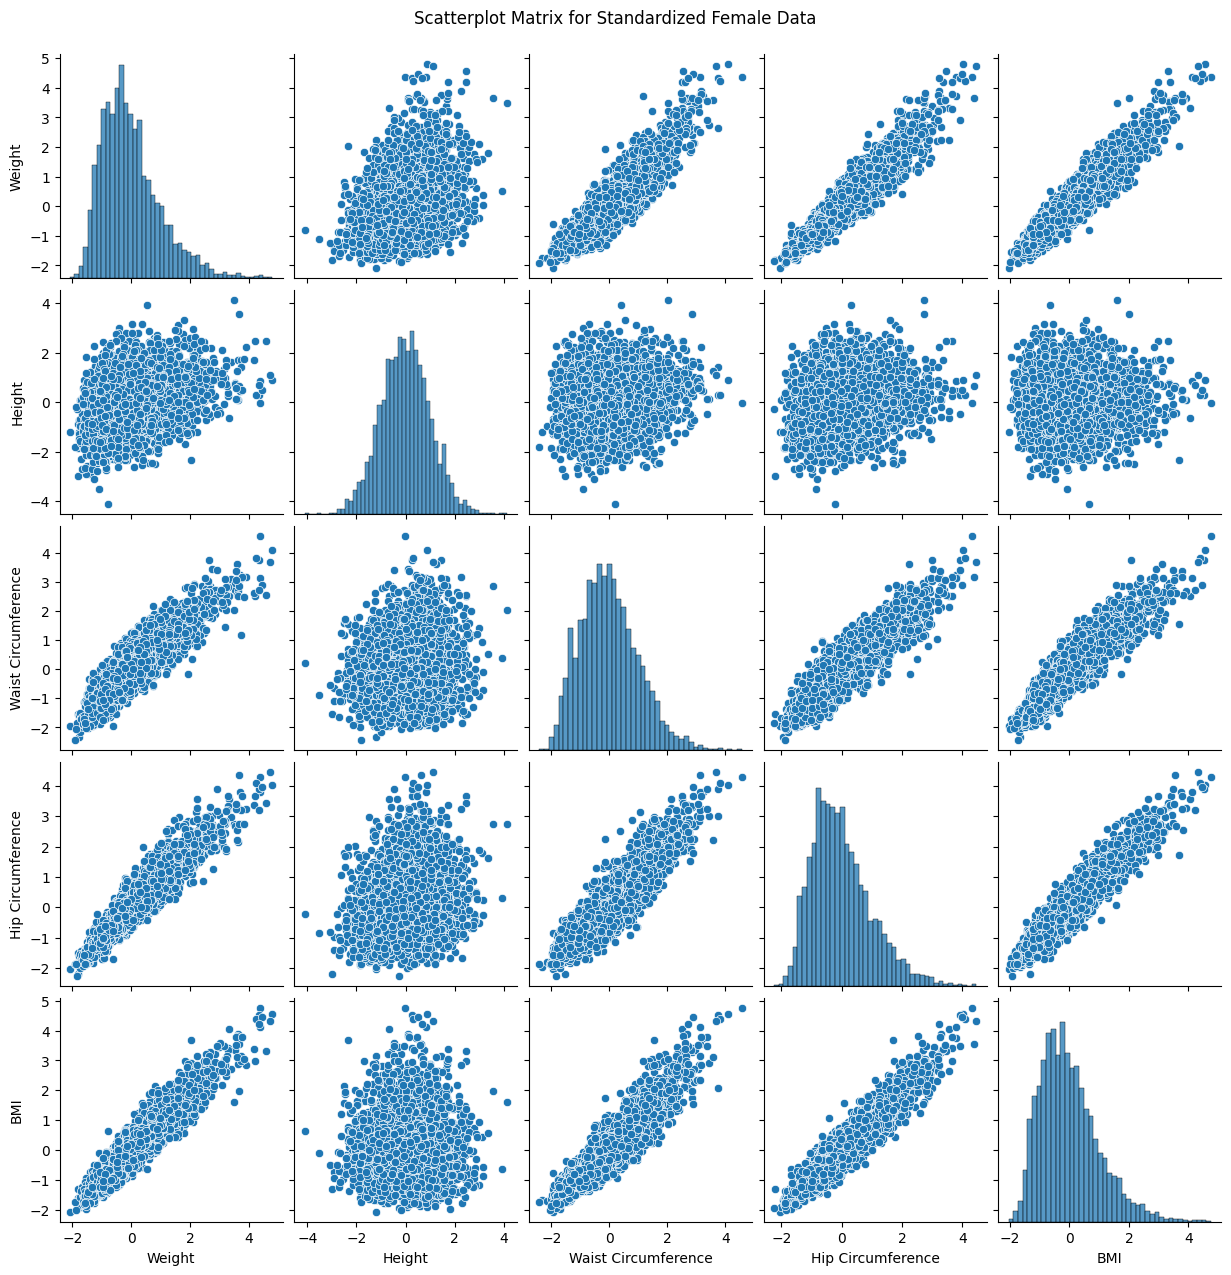

Pearson Correlation Matrix:
                       Weight    Height  Waist Circumference  \
Weight               1.000000  0.345496             0.904550   
Height               0.345496  1.000000             0.126547   
Waist Circumference  0.904550  0.126547             1.000000   
Hip Circumference    0.946553  0.202895             0.897407   
BMI                  0.945900  0.033077             0.921198   

                     Hip Circumference       BMI  
Weight                        0.946553  0.945900  
Height                        0.202895  0.033077  
Waist Circumference           0.897407  0.921198  
Hip Circumference             1.000000  0.944199  
BMI                           0.944199  1.000000  

Spearman Correlation Matrix:
                       Weight    Height  Waist Circumference  \
Weight               1.000000  0.338860             0.900169   
Height               0.338860  1.000000             0.108587   
Waist Circumference  0.900169  0.108587             1.00000

In [27]:
# Step 8: Scatterplot matrix for standardized female data
columns = ['Weight', 'Height', 'Waist Circumference', 'Hip Circumference', 'BMI']
df_zfemale = pd.DataFrame(zfemale[:, [0, 1, 6, 5, 7]], columns=columns)

sns.pairplot(df_zfemale)
plt.suptitle('Scatterplot Matrix for Standardized Female Data', y=1.02)
plt.show()

# Correlation coefficients
print("Pearson Correlation Matrix:")
print(df_zfemale.corr(method='pearson'))

print("\nSpearman Correlation Matrix:")
print(df_zfemale.corr(method='spearman'))

Add waist-to-height and waist-to-hip ratios

In [28]:
# Step 9: Add waist-to-height and waist-to-hip ratios
male_ratios = np.column_stack((
    male[:, 6] / male[:, 1],
    male[:, 6] / male[:, 5]
))
female_ratios = np.column_stack((
    female[:, 6] / female[:, 1],
    female[:, 6] / female[:, 5]
))
male = np.column_stack((male, male_ratios))
female = np.column_stack((female, female_ratios))

Boxplot for ratios

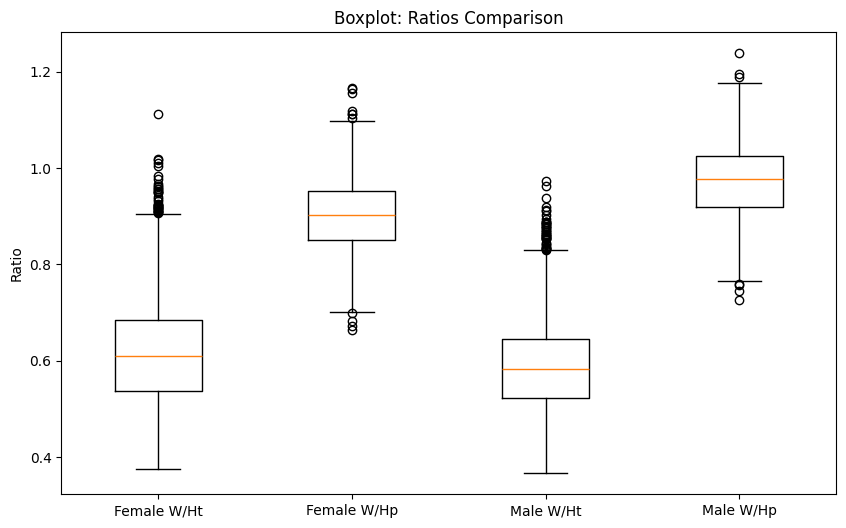

In [29]:
# Step 10: Boxplot for ratios
plt.figure(figsize=(10, 6))
plt.boxplot([female[:, -2], female[:, -1], male[:, -2], male[:, -1]],
            labels=['Female W/Ht', 'Female W/Hp', 'Male W/Ht', 'Male W/Hp'])
plt.title('Boxplot: Ratios Comparison')
plt.ylabel('Ratio')
plt.show()


Advantages and disadvantages

In [30]:
# Step 11: Advantages and disadvantages
print("""
Advantages:
- BMI: Easy to calculate, correlates with general health risks.
- Waist-to-Height: Accounts for body shape and abdominal fat.
- Waist-to-Hip: Useful for cardiovascular risk assessment.

Disadvantages:
- BMI: Does not differentiate between fat and muscle mass.
- Waist-to-Height: May misclassify tall or short individuals.
- Waist-to-Hip: Does not account for overall obesity.
""")


Advantages:
- BMI: Easy to calculate, correlates with general health risks.
- Waist-to-Height: Accounts for body shape and abdominal fat.
- Waist-to-Hip: Useful for cardiovascular risk assessment.

Disadvantages:
- BMI: Does not differentiate between fat and muscle mass.
- Waist-to-Height: May misclassify tall or short individuals.
- Waist-to-Hip: Does not account for overall obesity.



Print rows with lowest and highest BMI

In [31]:
# Step 12: Print rows with lowest and highest BMI
sorted_indices = np.argsort(female[:, 7])
low_bmi = zfemale[sorted_indices[:5]]
high_bmi = zfemale[sorted_indices[-5:]]

print("5 Lowest BMI Standardized Data:")
print(low_bmi)

print("\n5 Highest BMI Standardized Data:")
print(high_bmi)

5 Lowest BMI Standardized Data:
[[-2.07978523 -1.22299143 -1.5478402  -1.16905675 -2.1947611  -2.0405496
  -1.94212128 -2.05024028]
 [-1.88017988 -0.18929313 -1.71835247  0.38637892 -2.4443617  -1.85491922
  -2.05708015 -1.99487987]
 [-1.53667299  1.80730222  0.62619127  0.5730312  -2.26607556 -1.6756899
  -1.7064556  -1.97088383]
 [-1.843044   -0.26009438 -0.22637009  0.51081377 -2.30173278 -2.25178417
  -1.85590213 -1.94177591]
 [-1.61094475  0.88688592 -0.09848588  0.47970506 -2.21258971 -1.82931504
  -1.71220354 -1.89319577]]

5 Highest BMI Standardized Data:
[[ 4.2472403   0.29215539  1.86240524 -0.98240447  2.3693641   4.10445598
   3.81731803  4.39649161]
 [ 4.45612963  0.50455915  1.69189297 -1.13794804  3.34993787  3.98283607
   2.90339503  4.46201122]
 [ 4.34936397  0.27799514  2.84285081  1.94181459  4.36616887  3.9188256
   3.75409065  4.51466896]
 [ 4.8042785   0.88688592  2.11817365  1.81737973  3.77782461  4.02124236
   4.08172343  4.54270932]
 [ 4.36328993 -0.03353037 -

Conclusion and Analysis
1. Weight Distributions
Histograms:
Female weights are mostly concentrated between 50 kg and 90 kg, with a peak around 70–80 kg.
Male weights are generally heavier, with a distribution concentrated between 60 kg and 100 kg, peaking around 80–90 kg.
Males exhibit a slightly wider spread in weight than females.
Boxplots:
Female weights have lower median and narrower interquartile range (IQR) compared to males, suggesting less variability.
Both genders have outliers, indicating extreme weight values in the datasets.
2. Numerical Statistics
Females:
Mean weight: Indicates central tendency around 70–75 kg.
Lower standard deviation suggests less variability in weight among females.
Distribution skewness suggests a slight left-skew (mean slightly lower than median), indicating a few lower-weight individuals.
Males:
Mean weight is higher, around 80–85 kg.
Greater standard deviation indicates higher variability in weight compared to females.
Distribution is also slightly left-skewed, but with a heavier tail for higher weights.
3. Body Mass Index (BMI)
BMI Observations:
Most BMIs fall within normal and overweight categories for both males and females.
Extreme BMI values (e.g., very low or high) are outliers.
Scatterplot Matrix:
Weight, waist circumference, and hip circumference strongly correlate with BMI, as expected.
Waist and hip circumference show a moderate positive correlation with each other.
4. Waist-to-Height and Waist-to-Hip Ratios
Boxplot Observations:
Waist-to-height ratios are generally higher for males than females, reflecting greater abdominal fat relative to height.
Waist-to-hip ratios are also higher for males, indicating a more apple-shaped body structure compared to females' pear-shaped body structure.
Distribution Differences:
Females exhibit tighter distributions for both ratios, while males show more variability, particularly in waist-to-height ratios.
5. Advantages and Disadvantages of BMI and Ratios
BMI:
Advantage: Simple to calculate and widely used for health risk assessment.
Disadvantage: Does not differentiate between muscle and fat, leading to misclassification (e.g., athletes may have high BMI despite low body fat).
Waist-to-Height Ratio:
Advantage: Accounts for fat distribution and abdominal obesity, a better predictor of health risks.
Disadvantage: May misclassify individuals with extreme height (short or tall).
Waist-to-Hip Ratio:
Advantage: Provides insights into fat distribution and associated risks (e.g., cardiovascular health).
Disadvantage: Overlooks overall obesity and focuses only on proportions.
6. Lowest and Highest BMI Individuals
Lowest BMI:
These individuals have low weights relative to their heights and may indicate underweight or undernourished individuals.
Highest BMI:
These individuals are significantly heavier for their height, often indicating obesity and potential health risks.
Standardized z-scores highlight these extremes, showing how far these individuals deviate from the mean.
Summary
The analysis reveals significant gender differences in weight distributions, BMI, and fat distribution ratios. While males generally exhibit greater weight and variability, females show more compact distributions with relatively higher hip-to-waist ratios. These findings align with general physiological differences and highlight the utility of various metrics for understanding body composition and health risks.